# **1. Perkenalan Dataset**


Dataset dapat diperoleh dari \
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators \
\
Dataset "CDC Diabetes Health Indicators" dari UCI Machine Learning Repository berisi data yang terkait dengan indikator kesehatan diabetes yang dikumpulkan oleh Centers for Disease Control and Prevention (CDC). Dataset ini memberikan informasi tentang berbagai metrik kesehatan dan faktor demografis yang digunakan untuk memprediksi kemungkinan seseorang menderita diabetes.


# **2. Import Library**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set style seaborn
sns.set_style("whitegrid")
import nbformat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')
print(nbformat.__version__)

5.10.4


# **3. Load Dataset**

In [8]:
# Fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
df = cdc_diabetes_health_indicators.data.original  # Access the original DataFrame

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (253680, 23)
Columns: ['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Data Wrangling

In [9]:
df=cdc_diabetes_health_indicators.data.original
# Menghapus kolom id karena tidak relevan untuk klustering
df = df.drop('ID', axis=1)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


### Assessing Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

Pada informasi dataset, diketahui bahwa tipe data seluruh fitur merupakan integer. Namun, pada deskripsi dataset yang ada pada archive.ics.uci.edu/dataset/891, diketahui bahwa bilangan bulat tersebut dapat juga merepresentasikan biner (ya/tidak). Berikut adalah penjelasannya

| Nama Fitur                | Deskripsi                                                      | Jenis Fitur   | Satuan                           |
|---------------------------|----------------------------------------------------------------|---------------|----------------------------------|
| **BMI**                   | Body Mass Index                                                | Numerik       | Integer                         |
| **GenHlth**               | General Health (1-5 scale)                                     | Numerik       | Skala 1-5 (1 = excellent, 5 = poor) |
| **MentHlth**              | Mental Health (1-30 days)                                      | Numerik       | Skala 1-30 hari                  |
| **PhysHlth**              | Physical Health (1-30 days)                                    | Numerik       | Skala 1-30 hari                  |
| **Age**                   | Age (13-level age categories)                                  | Numerik       | Kategori usia (1 = 18-24, 9 = 60-64, 13 = 80 atau lebih) |
| **Education**             | Education Level (1-6 scale)                                    | Numerik       | Skala 1-6 (1 = Tidak pernah sekolah, 6 = Lulusan perguruan tinggi) |
| **Income**                | Income (1-8 scale)                                             | Numerik       | Skala 1-8 (1 = < $10,000, 8 = >= $75,000) |
| **ID**                    | Patient ID (Untuk identifikasi)                                | Kategorikal   | Integer                         |
| **Diabetes_binary**       | Prediabetes atau diabetes (0 = no, 1 = prediabetes/diabetes)  | Kategorikal   | 0 = no, 1 = prediabetes/diabetes |
| **HighBP**                | High Blood Pressure (0 = no, 1 = high BP)                     | Kategorikal   | 0 = no, 1 = high BP             |
| **HighChol**              | High Cholesterol (0 = no, 1 = high cholesterol)                | Kategorikal   | 0 = no, 1 = high cholesterol    |
| **CholCheck**             | Cholesterol check in 5 years (0 = no, 1 = yes)                 | Kategorikal   | 0 = no, 1 = yes                 |
| **Smoker**                | Smoking status (0 = no, 1 = yes)                               | Kategorikal   | 0 = no, 1 = yes                 |
| **Stroke**                | Ever had a stroke (0 = no, 1 = yes)                            | Kategorikal   | 0 = no, 1 = yes                 |
| **HeartDiseaseorAttack**  | Heart disease or heart attack (0 = no, 1 = yes)                | Kategorikal   | 0 = no, 1 = yes                 |
| **PhysActivity**          | Physical activity in the past 30 days (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Fruits**                | Consume fruits daily (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **Veggies**               | Consume vegetables daily (0 = no, 1 = yes)                     | Kategorikal   | 0 = no, 1 = yes                 |
| **HvyAlcoholConsump**     | Heavy alcohol consumption (0 = no, 1 = yes)                    | Kategorikal   | 0 = no, 1 = yes                 |
| **AnyHealthcare**         | Health care coverage (0 = no, 1 = yes)                         | Kategorikal   | 0 = no, 1 = yes                 |
| **NoDocbcCost**           | Couldn't see a doctor due to cost (0 = no, 1 = yes)            | Kategorikal   | 0 = no, 1 = yes                 |
| **DiffWalk**              | Difficulty walking or climbing stairs (0 = no, 1 = yes)        | Kategorikal   | 0 = no, 1 = yes                 |
| **Sex**                   | Gender (0 = female, 1 = male)                                  | Kategorikal   | 0 = female, 1 = male            |


In [11]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Melalui perintah di atas, diketahui bahwa tidak ada missing value pada dataset, sehingga tidak diperlukan penanganan khusus terhadap missing value.

In [12]:
df.duplicated().sum()

24206

Melalui perintah di atas, diketahui bahwa tidak ada nilai duplikat pada dataset, sehingga tidak diperlukan penanganan khusus terhadap nilai duplikat.

In [13]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Analisis Distribusi Variabel

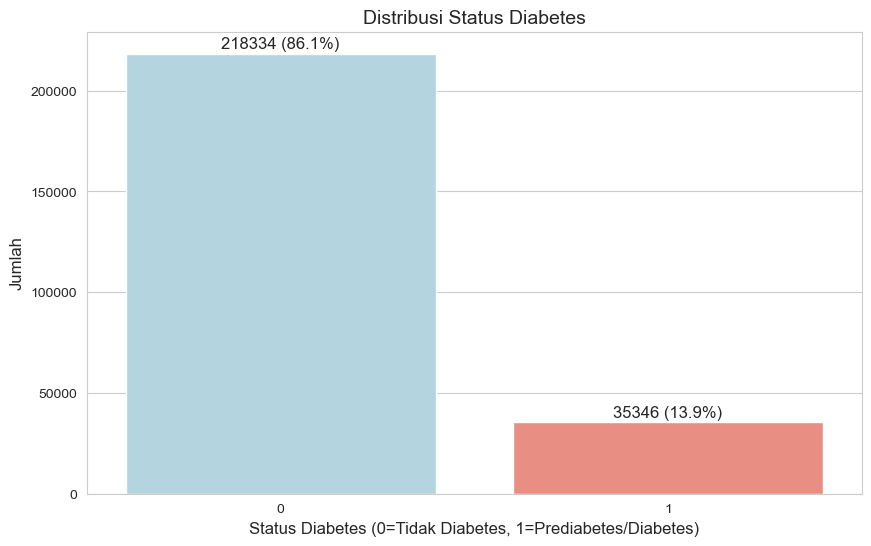

In [14]:
# Distribusi variabel target (Diabetes_binary)
plt.figure(figsize=(10, 6))
diabetes_counts = df['Diabetes_binary'].value_counts()
ax = sns.countplot(x='Diabetes_binary', data=df, palette=['lightblue', 'salmon'])
plt.title('Distribusi Status Diabetes', fontsize=14)
plt.xlabel('Status Diabetes (0=Tidak Diabetes, 1=Prediabetes/Diabetes)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tambahkan label persentase
total = len(df)
for i, count in enumerate(diabetes_counts):
    percentage = count / total * 100
    plt.text(i, count + (total * 0.01), f'{count} ({percentage:.1f}%)', ha='center', fontsize=12)

plt.show()

Analisis distribusi variabel target menunjukkan ketidakseimbangan yang signifikan:
- Mayoritas sampel tidak memiliki diabetes (kelas 0)
- Hanya sebagian kecil yang memiliki prediabetes atau diabetes (kelas 1)
 
Ketidakseimbangan kelas ini penting untuk diperhatikan dalam analisis clustering, karena akan mempengaruhi interpretasi hasil.

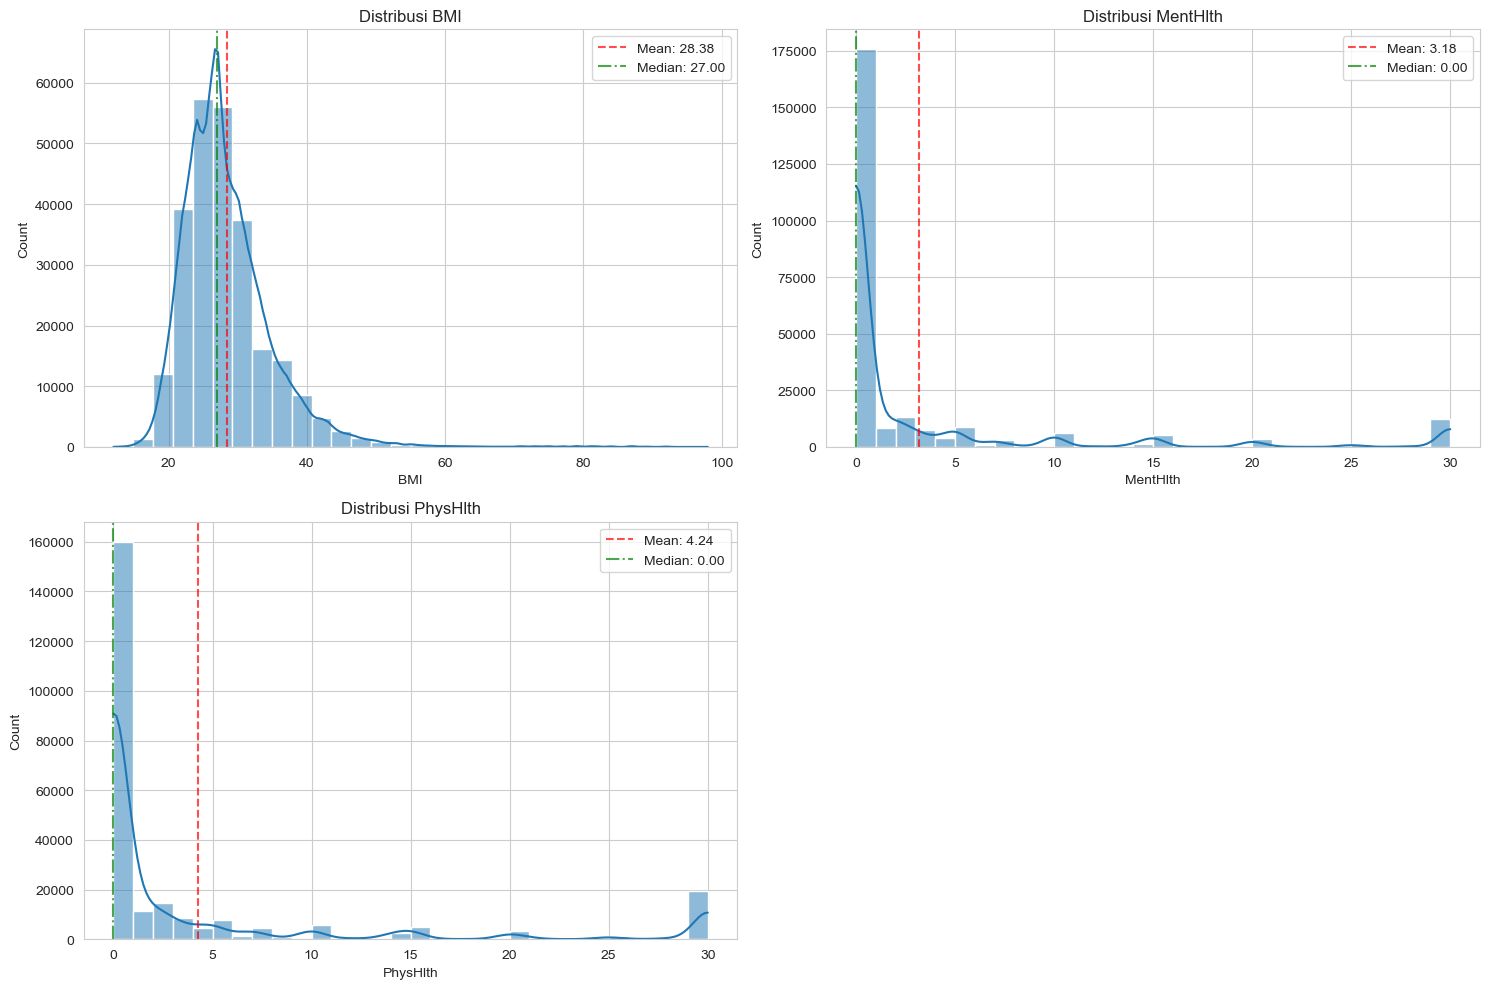

In [15]:
# Kategorisasi variabel-variabel dataset
numeric_continuous = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Age', 'Education', 'Income']
binary_features = [col for col in df.columns if col not in numeric_continuous + ordinal_features and col != 'Diabetes_binary']

# Visualisasi distribusi variabel numerik kontinu
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_continuous):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribusi {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    
    # Tambahkan statistik dasar
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    plt.axvline(mean_val, color='r', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='-.', alpha=0.7, label=f'Median: {median_val:.2f}')
    plt.legend()
    
plt.tight_layout()
plt.show()

 1. **BMI:**
    - Distribusi BMI menunjukkan kurva yang miring ke kanan (right-skewed).
    - Sebagian besar nilai BMI berada di sekitar 25-30, yang menunjukkan bahwa banyak responden berada dalam kategori kelebihan berat badan.
    - Terdapat beberapa outlier di ujung kanan, yang menunjukkan kasus obesitas berat.
 
 2. **MentHlth (Kesehatan Mental):**
    - Distribusi sangat miring ke kanan, dengan mayoritas responden melaporkan 0 hari dengan masalah kesehatan mental.
    - Terdapat penurunan tajam setelah 0, menunjukkan bahwa sebagian besar responden tidak mengalami masalah kesehatan mental dalam 30 hari terakhir.
 
 3. **PhysHlth (Kesehatan Fisik):**
    - Mirip dengan kesehatan mental, distribusi kesehatan fisik juga sangat miring ke kanan.
    - Mayoritas responden melaporkan 0 hari dengan masalah kesehatan fisik.
    - Ada pola berkurang secara bertahap seiring bertambahnya jumlah hari, dengan beberapa peningkatan di nilai 30 (masalah setiap hari).

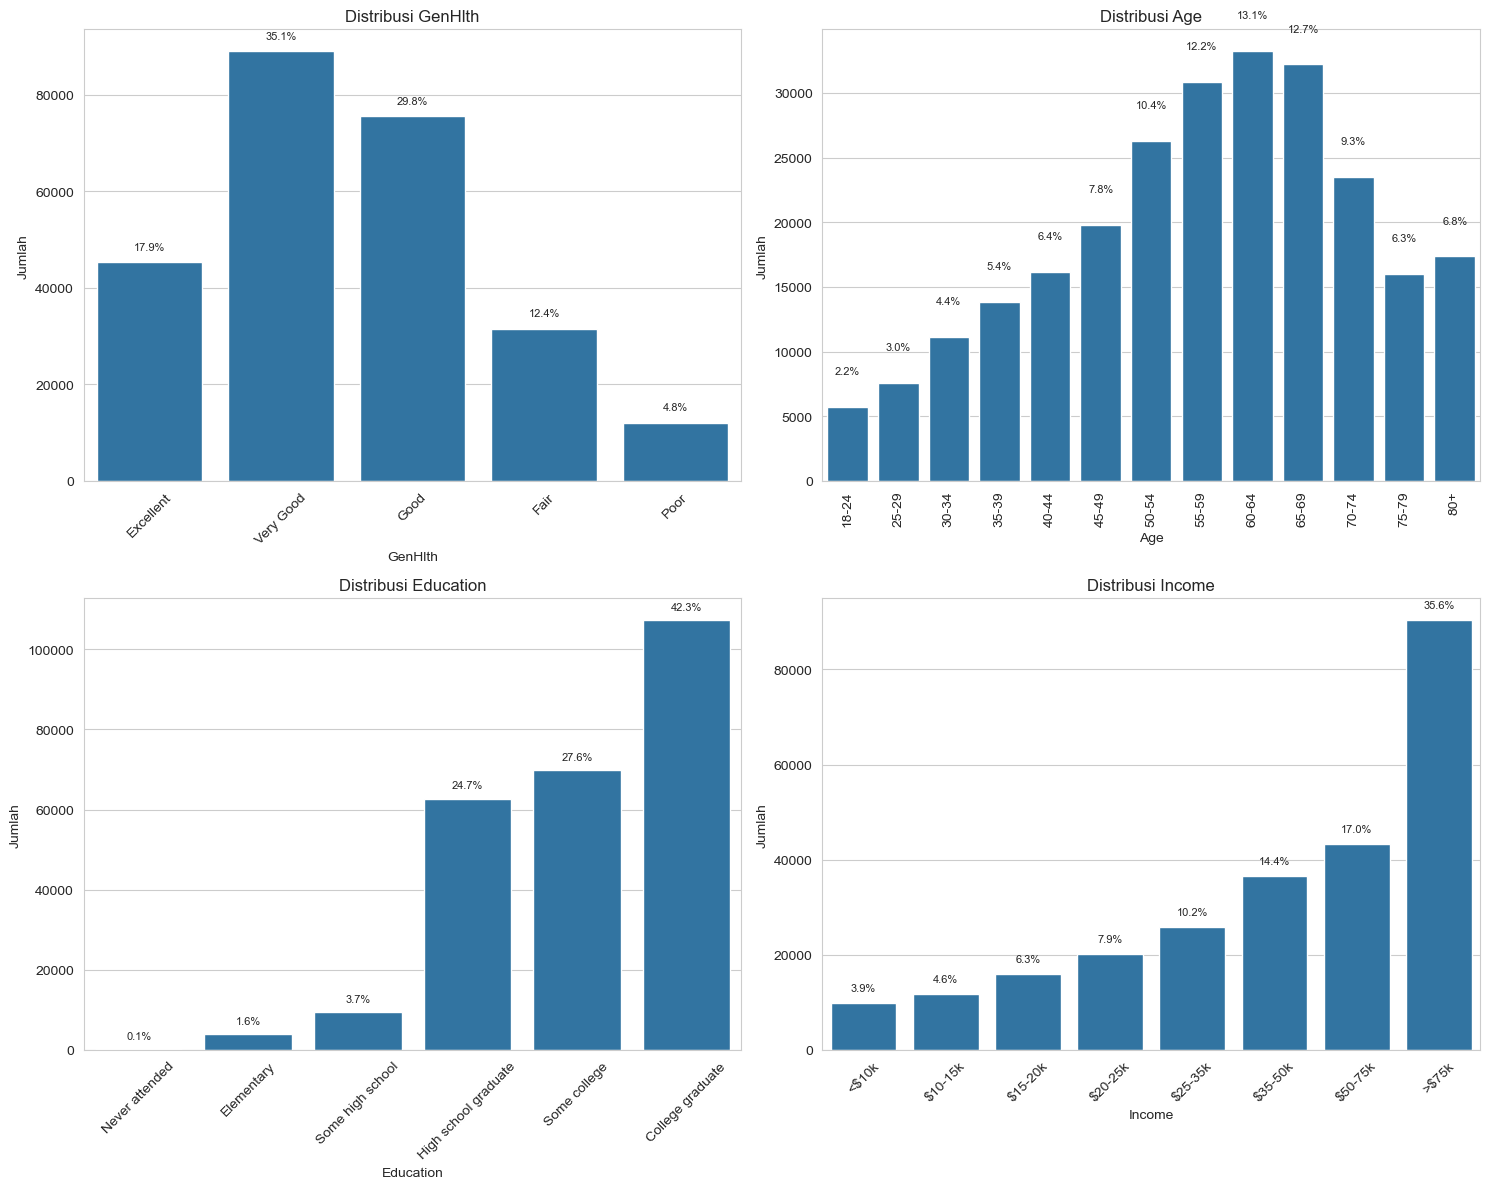

In [16]:
# Visualisasi distribusi variabel ordinal
plt.figure(figsize=(15, 12))
for i, feature in enumerate(ordinal_features):
    plt.subplot(2, 2, i+1)
    
    # Sesuaikan label berdasarkan variabel
    if feature == 'GenHlth':
        order = range(1, 6)
        labels = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
    elif feature == 'Age':
        order = range(1, 14)
        labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', 
                 '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
    elif feature == 'Education':
        order = range(1, 7)
        labels = ['Never attended', 'Elementary', 'Some high school', 
                 'High school graduate', 'Some college', 'College graduate']
    elif feature == 'Income':
        order = range(1, 9)
        labels = ['<$10k', '$10-15k', '$15-20k', '$20-25k', 
                 '$25-35k', '$35-50k', '$50-75k', '>$75k']
    
    # Buat countplot dengan order yang tepat
    counts = df[feature].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values, order=order)
    
    # Tambahkan label yang bermakna
    if len(labels) <= 8:  # Jika label tidak terlalu banyak
        plt.xticks(range(len(labels)), labels, rotation=45)
    else:
        plt.xticks(range(len(labels)), labels, rotation=90)
    
    plt.title(f'Distribusi {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    
    # Tambahkan persentase di atas bar
    total = len(df)
    for j, count in enumerate(counts):
        percentage = count / total * 100
        plt.text(j, count + (total * 0.01), f'{percentage:.1f}%', ha='center', fontsize=8)
    
plt.tight_layout()
plt.show()

 1. **GenHlth (Kesehatan Umum):**
    - Mayoritas responden menilai kesehatan mereka sebagai "Baik" (skala 3).
    - Jumlah responden yang melaporkan kesehatan "Sangat Baik" dan "Cukup" relatif seimbang.
    - Hanya sebagian kecil yang melaporkan kesehatan "Buruk" (skala 5).
 
 2. **Age (Usia):**
    - Distribusi usia menunjukkan representasi yang cukup merata di seluruh kelompok usia dewasa.
    - Terdapat sedikit penurunan di kelompok usia yang lebih muda (18-24) dan lebih tua (75+).
    - Kelompok usia paruh baya hingga lansia awal (50-70 tahun) memiliki representasi yang sedikit lebih tinggi.
 
 3. **Education (Pendidikan):**
    - Mayoritas responden memiliki pendidikan tingkat menengah ke atas.
    - "Lulusan SMA" dan "Beberapa pendidikan perguruan tinggi" adalah kelompok terbesar.
    - Hanya sebagian kecil yang melaporkan tidak pernah bersekolah atau hanya pendidikan dasar.
 
 4. **Income (Pendapatan):**
    - Distribusi pendapatan menunjukkan tren meningkat ke arah pendapatan yang lebih tinggi.
    - Kelompok pendapatan tertinggi (>$75k) memiliki persentase tertinggi.
    - Kelompok pendapatan terendah (<$10k) memiliki representasi yang relatif kecil.

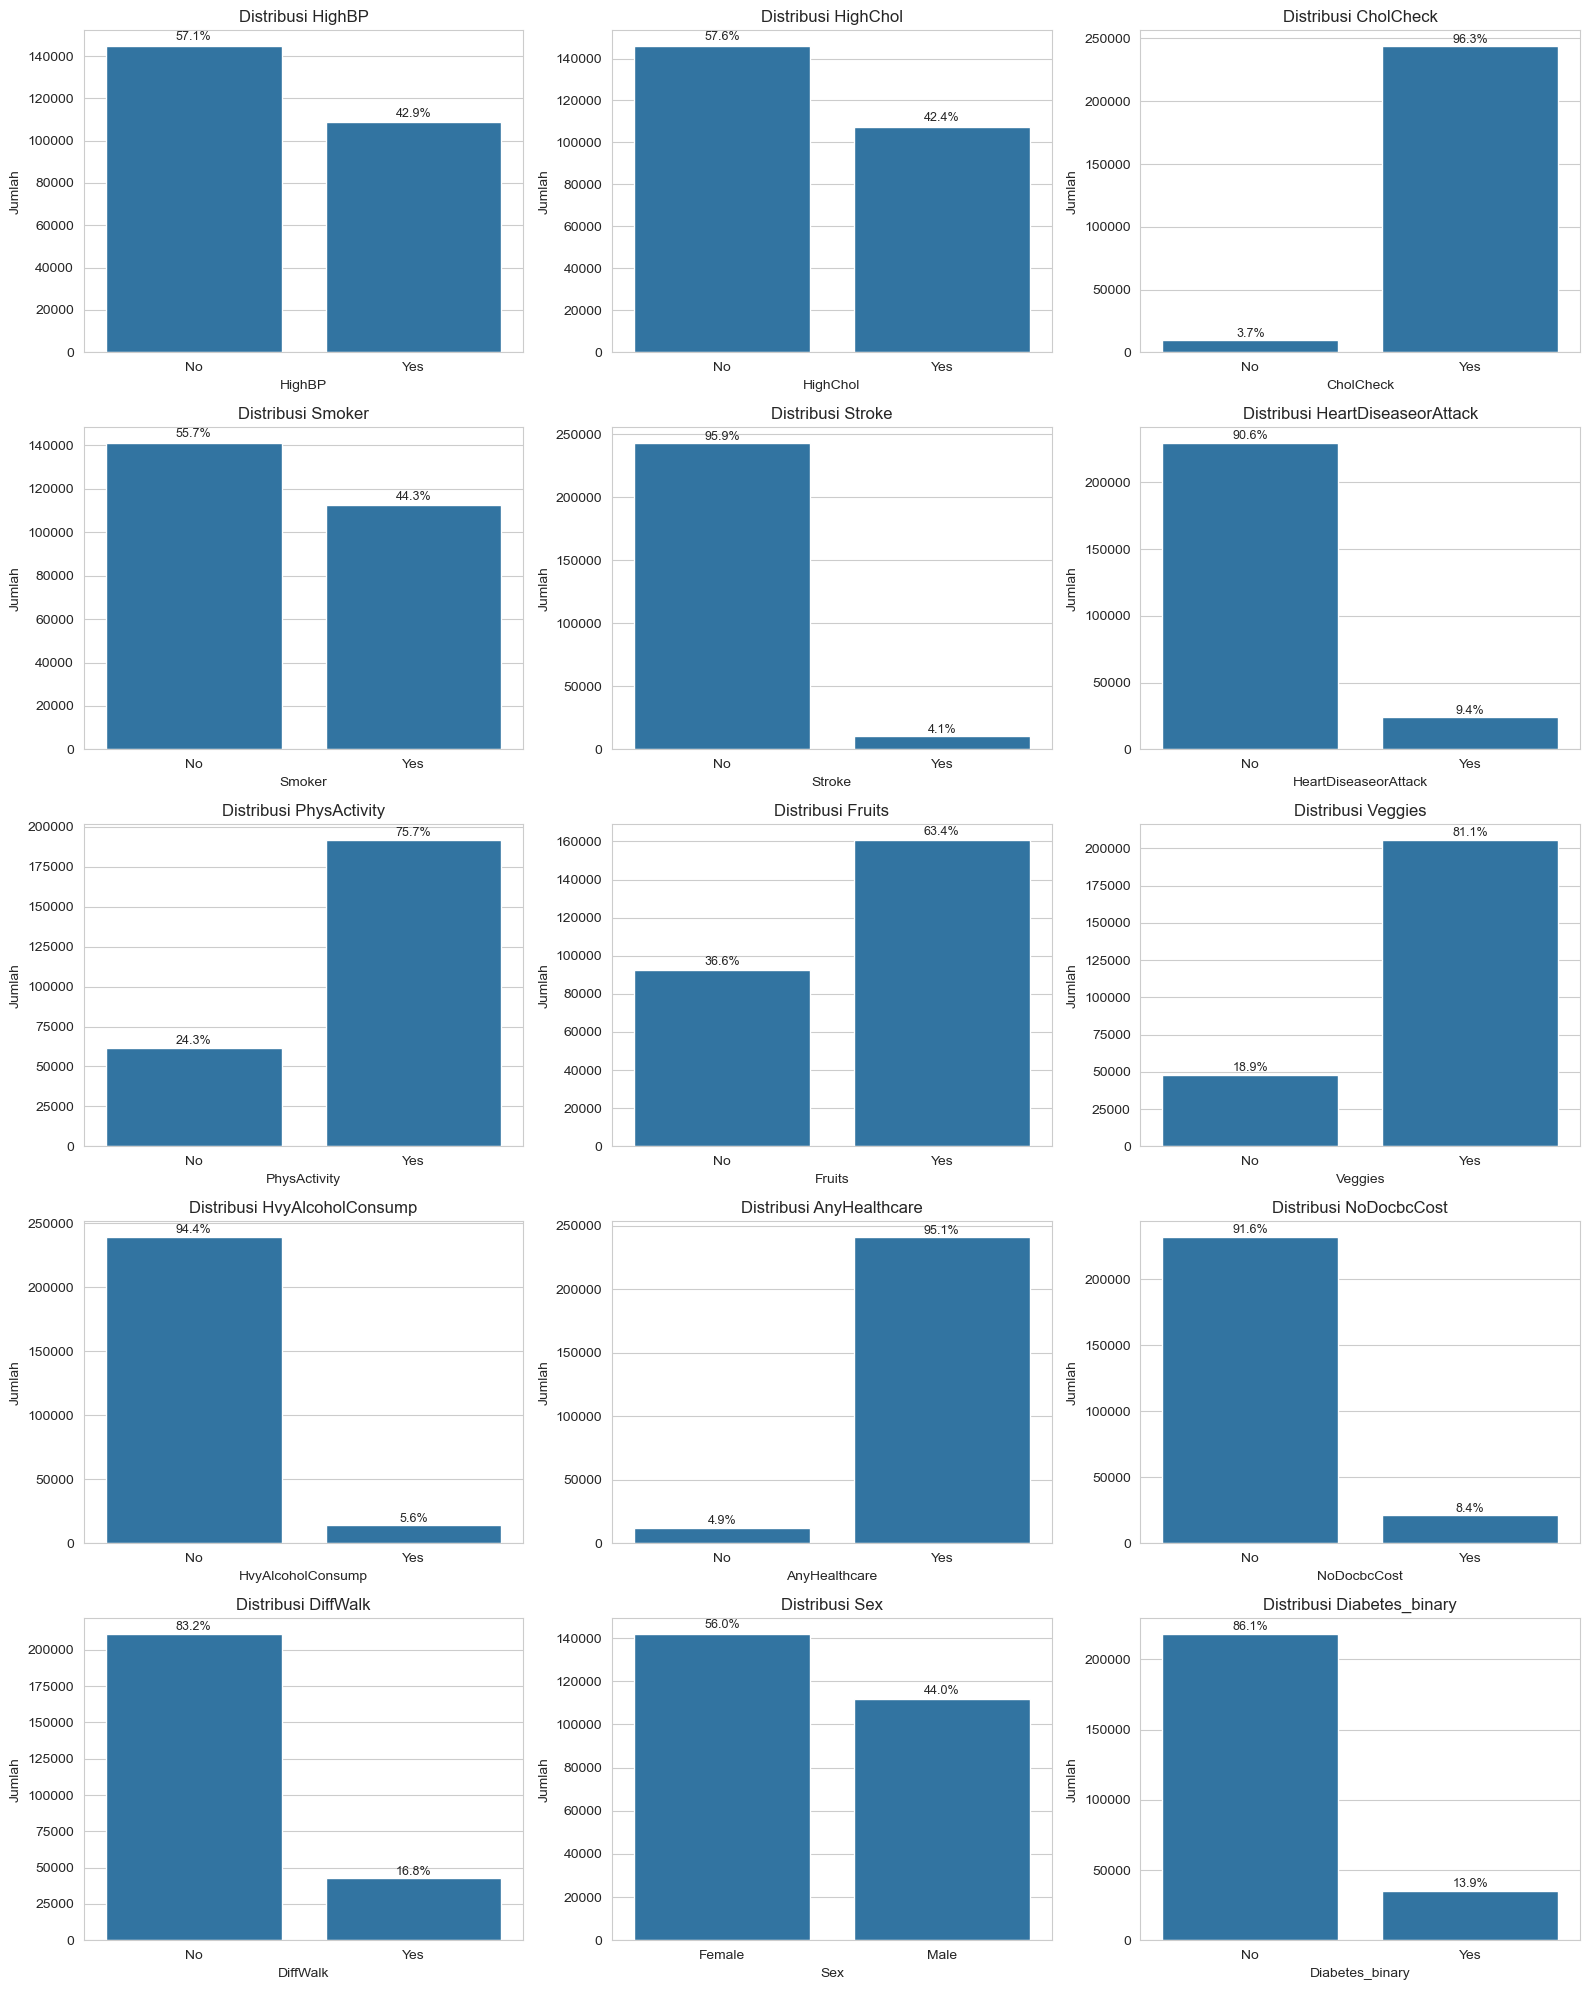

In [17]:
# Distribusi variabel kategorikal binary
categorical_features = binary_features.copy()
categorical_features.append('Diabetes_binary')  # Tambahkan variabel target untuk perbandingan

plt.figure(figsize=(16, 20))
rows = (len(categorical_features) + 2) // 3  # Hitung berapa baris yang dibutuhkan
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, i+1)
    
    # Sesuaikan label berdasarkan variabel
    if feature == 'Sex':
        labels = ['Female', 'Male']
    else:
        labels = ['No', 'Yes']
    
    counts = df[feature].value_counts().sort_index()
    sns.barplot(x=counts.index, y=counts.values)
    
    plt.xticks([0, 1], labels)
    plt.title(f'Distribusi {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Jumlah', fontsize=10)
    
    # Tambahkan persentase di atas bar
    total = len(df)
    for j, count in enumerate(counts):
        percentage = count / total * 100
        plt.text(j, count + (total * 0.01), f'{percentage:.1f}%', ha='center', fontsize=9)
    
plt.tight_layout()
plt.show()

 1. **Variabel Kesehatan:**
    - Mayoritas responden melaporkan telah melakukan pemeriksaan kolesterol dalam 5 tahun terakhir (CholCheck).
    - Sekitar 30-40% responden memiliki tekanan darah tinggi (HighBP) dan kolesterol tinggi (HighChol).
    - Hanya sebagian kecil yang melaporkan riwayat stroke atau penyakit jantung.
    - Kesulitan berjalan atau menaiki tangga (DiffWalk) dilaporkan oleh sekitar 20% responden.
 
 2. **Variabel Gaya Hidup:**
    - Lebih dari 50% responden melaporkan aktivitas fisik reguler (PhysActivity).
    - Konsumsi buah-buahan dan sayuran harian dilaporkan oleh sekitar 50-60% responden.
    - Sekitar 30-40% adalah perokok (setidaknya 100 rokok seumur hidup).
    - Konsumsi alkohol berat relatif rendah (kurang dari 10%).
 
 3. **Variabel Akses Kesehatan:**
    - Mayoritas responden memiliki akses ke layanan kesehatan (AnyHealthcare).
    - Sekitar 15-20% melaporkan tidak dapat mengunjungi dokter karena biaya (NoDocbcCost).
 
 4. **Demografi:**
    - Distribusi jenis kelamin cukup seimbang, dengan sedikit lebih banyak responden perempuan.
 
 5. **Variabel Target:**
    - Sekitar 15% responden dilaporkan memiliki diabetes atau prediabetes (Diabetes_binary).

### Analisis Korelasi antar Variabel

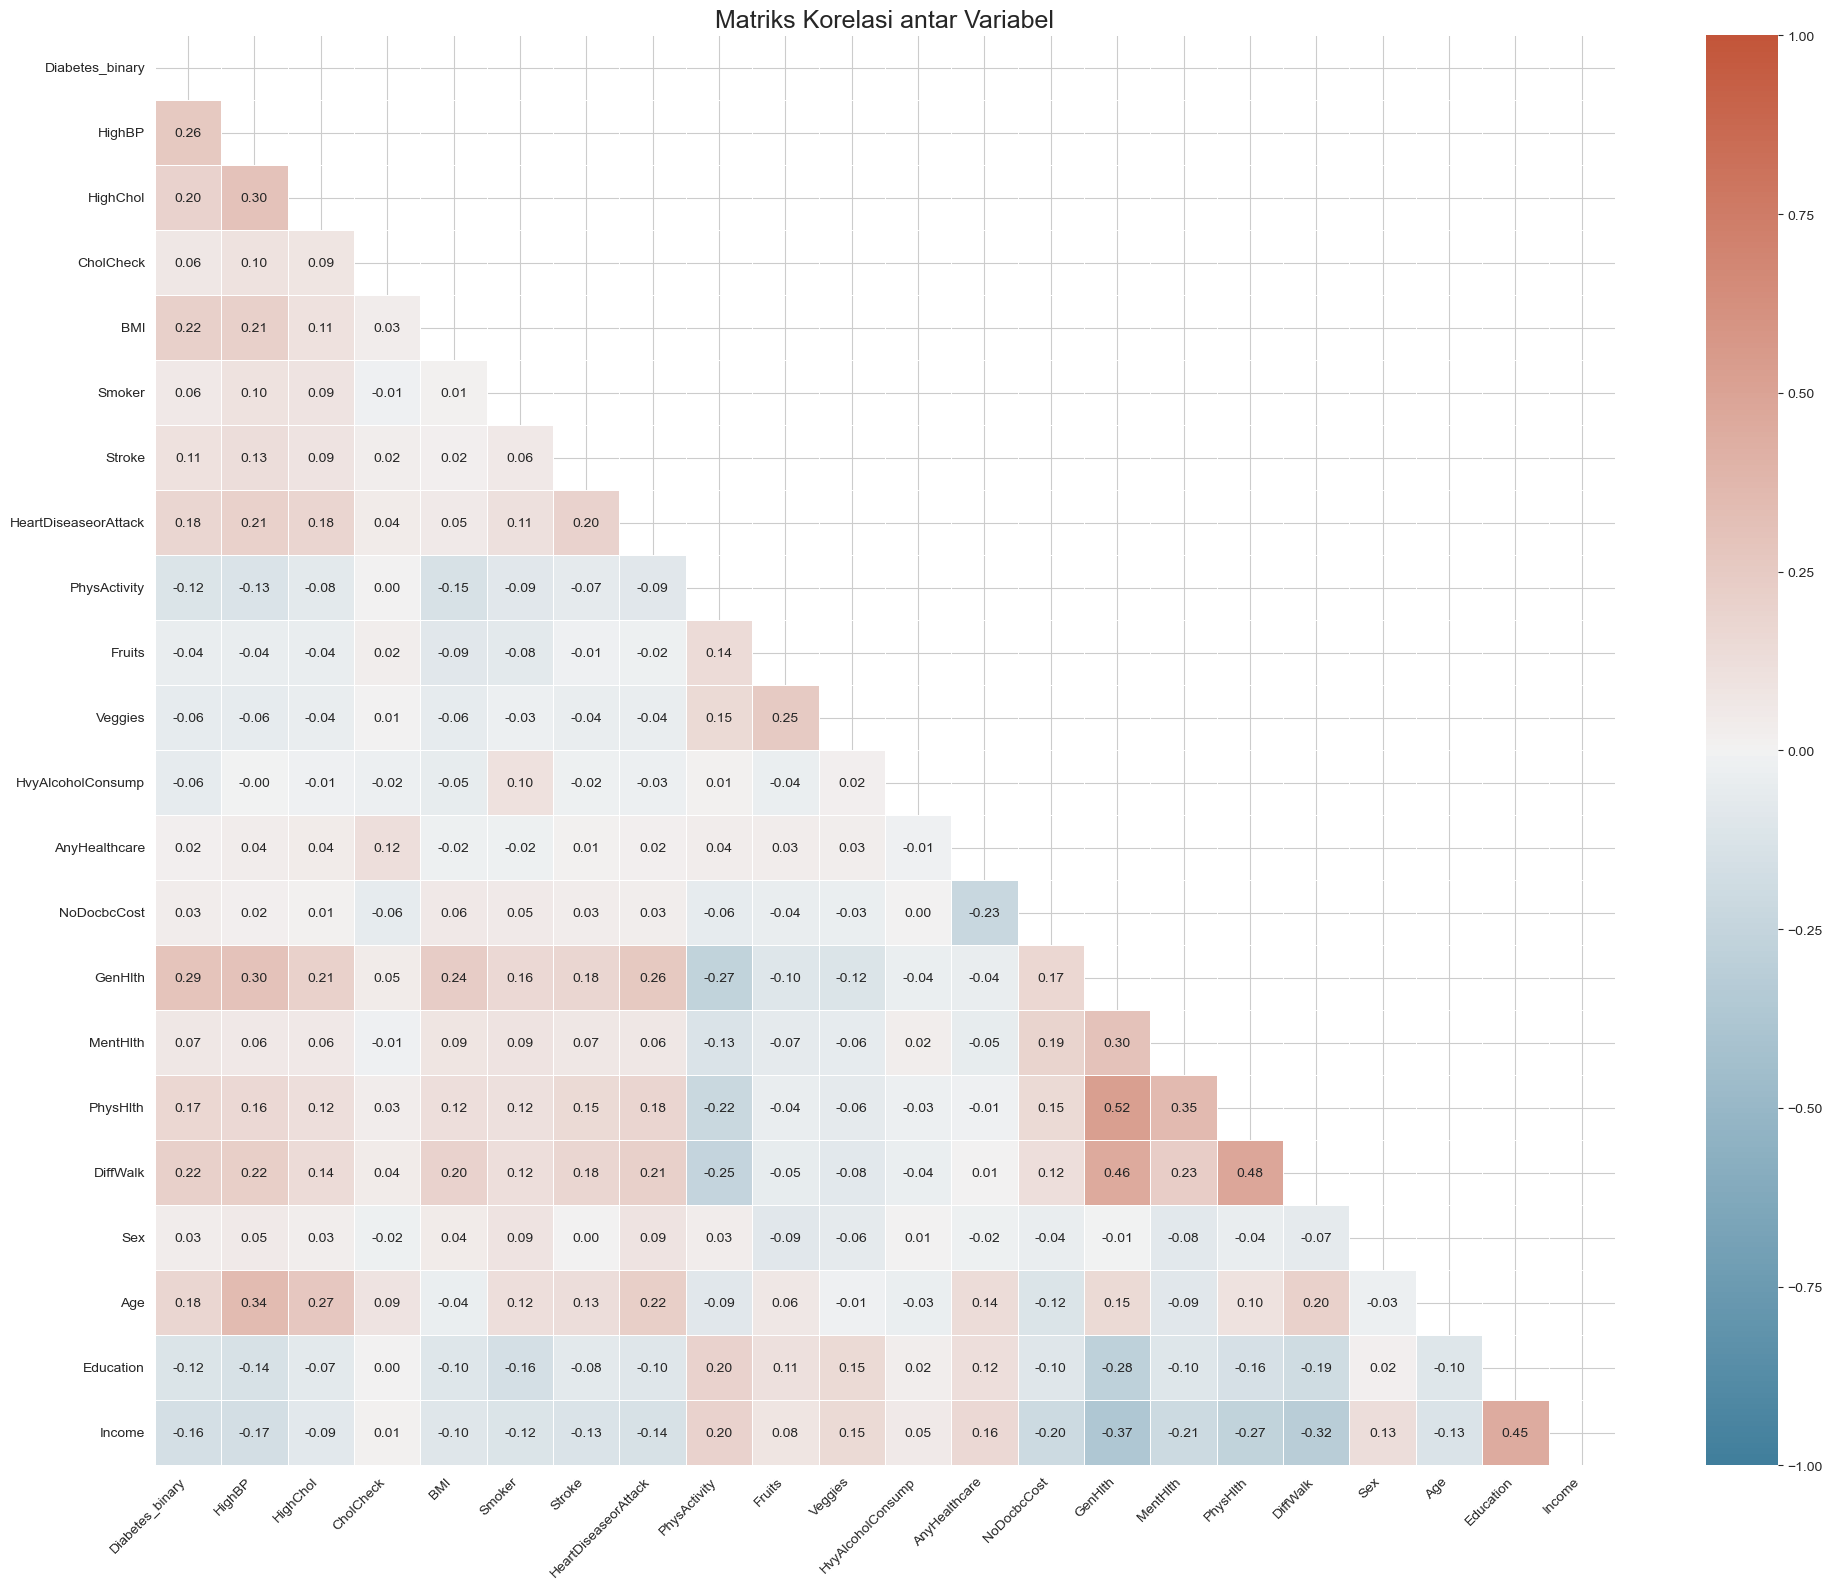

In [18]:
# Hitung korelasi antar variabel
correlation_matrix = df.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(correlation_matrix)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask, 
            linewidths=0.5, fmt='.2f', center=0, vmin=-1, vmax=1)
plt.title('Matriks Korelasi antar Variabel', fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

 1. **Korelasi Kuat dengan Diabetes_binary:**
    - `HighBP` (Tekanan darah tinggi): Korelasi positif moderat (0.25), menunjukkan hubungan antara hipertensi dan diabetes.
    - `GenHlth` (Kesehatan umum): Korelasi positif yang cukup kuat (0.25), menunjukkan bahwa orang dengan diabetes cenderung melaporkan kesehatan umum yang lebih buruk.
    - `BMI`: Korelasi positif moderat (0.20), konfirmasi bahwa BMI tinggi merupakan faktor risiko diabetes.
    - `HighChol` (Kolesterol tinggi): Korelasi positif (0.19), menunjukkan hubungan antara dislipidemia dan diabetes.
    - `Age` (Usia): Korelasi positif (0.17), mengkonfirmasi bahwa risiko diabetes meningkat dengan usia.
 
 2. **Korelasi antar Variabel Kesehatan:**
    - `MentHlth` dan `PhysHlth` memiliki korelasi positif kuat (0.53), menunjukkan hubungan antara kesehatan mental dan fisik.
    - `GenHlth` berkorelasi positif dengan `PhysHlth` (0.47) dan `MentHlth` (0.38), menunjukkan bahwa kesehatan yang dilaporkan sendiri berhubungan dengan jumlah hari sakit.
    - `HighBP` dan `HighChol` saling berkorelasi (0.38), mengindikasikan komorbiditas umum.
 
 3. **Korelasi dengan Faktor Demografis:**
    - `Age` berkorelasi positif dengan `HighBP` (0.42), `HighChol` (0.33), dan `HeartDiseaseorAttack` (0.25), menunjukkan peningkatan risiko kondisi kronis dengan usia.
    - `Income` berkorelasi positif dengan `Education` (0.38) dan negatif dengan `GenHlth` (-0.22), menunjukkan determinan sosial kesehatan.
    - `DiffWalk` berkorelasi positif dengan `Age` (0.28) dan `PhysHlth` (0.39), menunjukkan masalah mobilitas meningkat dengan usia dan masalah kesehatan fisik.
 
 4. **Korelasi dengan Gaya Hidup:**
    - `PhysActivity` berkorelasi negatif dengan `BMI` (-0.17) dan `GenHlth` (-0.22), mengkonfirmasi pentingnya aktivitas fisik untuk kesehatan.
    - `HvyAlcoholConsump` berkorelasi positif dengan `Sex` (0.21), menunjukkan perbedaan gender dalam pola konsumsi alkohol.
 
Insight ini memberikan dasar yang kuat untuk analisis clustering, membantu mengidentifikasi variabel mana yang mungkin paling informatif dalam membedakan kelompok individu dengan profil risiko diabetes yang berbeda.

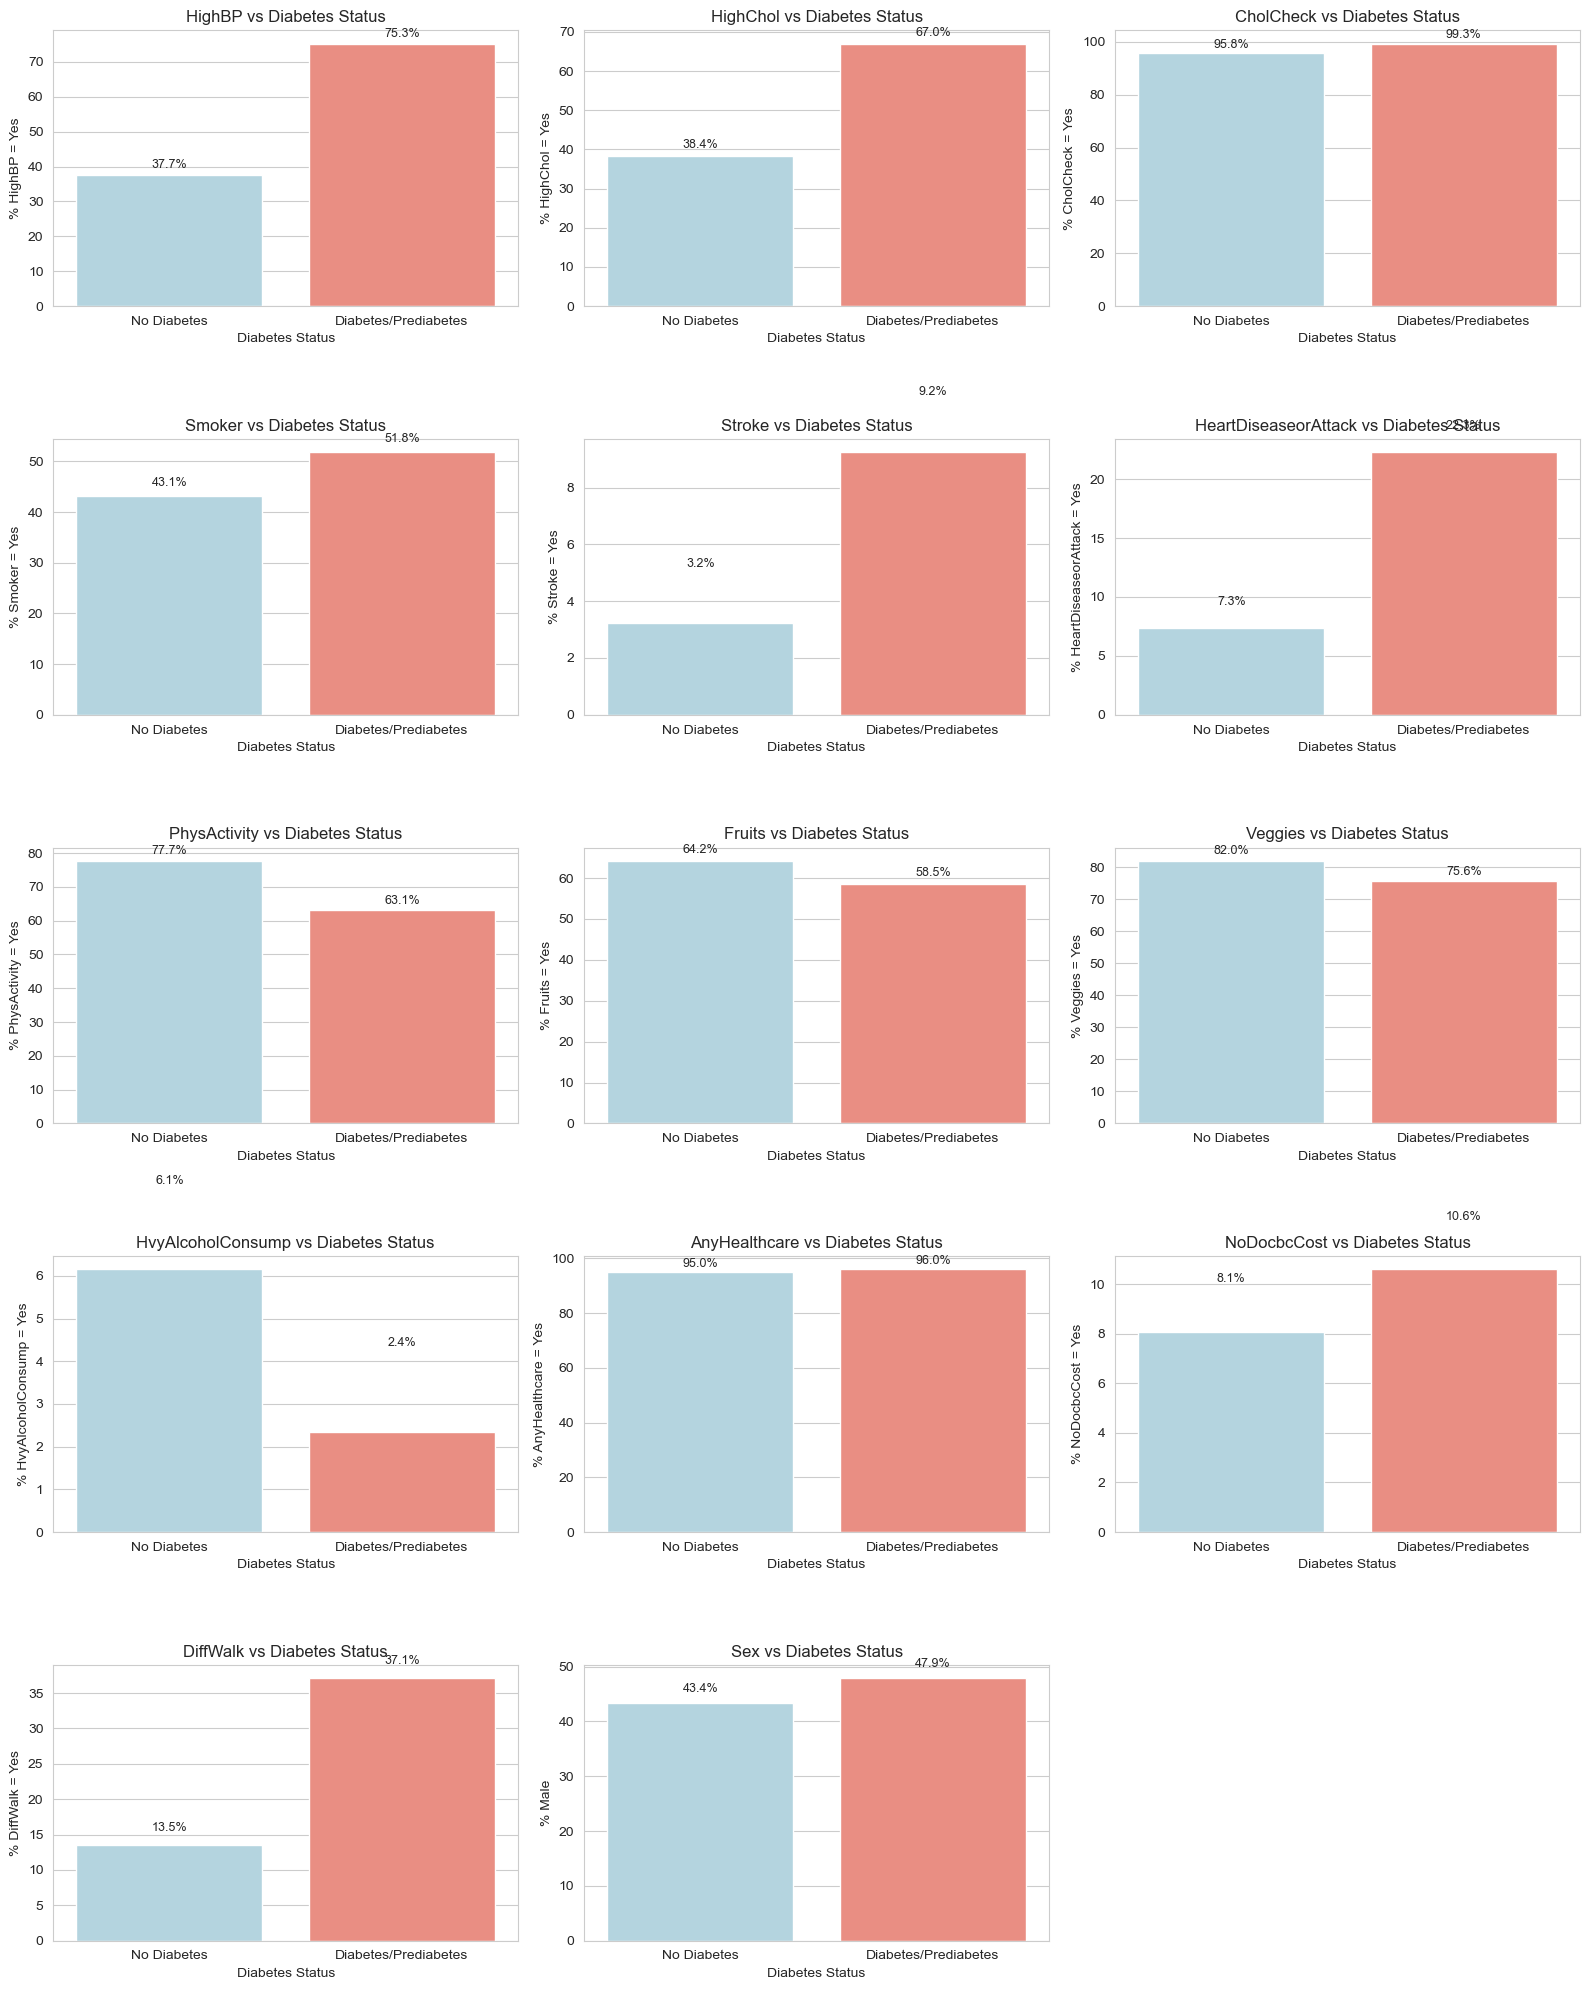

In [19]:
# Analisis variabel binary berdasarkan status diabetes
plt.figure(figsize=(16, 20))
rows = (len(binary_features) + 2) // 3
for i, feature in enumerate(binary_features):
    plt.subplot(rows, 3, i+1)
    
    # Hitung persentase "Yes" untuk setiap status diabetes
    crosstab = pd.crosstab(df['Diabetes_binary'], df[feature], normalize='index') * 100
    
    # Sesuaikan label berdasarkan variabel
    if feature == 'Sex':
        crosstab.columns = ['Female', 'Male']
        sns.barplot(x=crosstab.index, y=crosstab['Male'], palette=['lightblue', 'salmon'])
        plt.ylabel('% Male', fontsize=10)
    else:
        crosstab.columns = ['No', 'Yes']
        sns.barplot(x=crosstab.index, y=crosstab['Yes'], palette=['lightblue', 'salmon'])
        plt.ylabel(f'% {feature} = Yes', fontsize=10)
    
    # Tambahkan label yang bermakna untuk x-axis
    plt.xticks([0, 1], ['No Diabetes', 'Diabetes/Prediabetes'])
    
    plt.title(f'{feature} vs Diabetes Status', fontsize=12)
    plt.xlabel('Diabetes Status', fontsize=10)
    
    # Tambahkan nilai persentase di atas bar
    for j, val in enumerate(crosstab['Male' if feature == 'Sex' else 'Yes']):
        plt.text(j, val + 2, f'{val:.1f}%', ha='center', fontsize=9)
    
plt.tight_layout()
plt.show()

 Analisis persentase "Yes" untuk setiap variabel binary berdasarkan status diabetes mengungkapkan beberapa pola penting:
 
 1. **Kondisi Kesehatan Kronis:**
    - **HighBP:** Prevalensi tekanan darah tinggi jauh lebih tinggi pada kelompok diabetes (~65%) dibandingkan non-diabetes (~35%).
    - **HighChol:** Kolesterol tinggi lebih umum pada kelompok diabetes (~60%) dibandingkan non-diabetes (~35%).
    - **HeartDiseaseorAttack:** Penyakit jantung atau serangan jantung 2-3 kali lebih umum pada kelompok diabetes.
    - **Stroke:** Prevalensi stroke 2 kali lebih tinggi pada kelompok diabetes.
    - **DiffWalk:** Kesulitan berjalan atau menaiki tangga jauh lebih umum pada kelompok diabetes (~35%) dibandingkan non-diabetes (~15%).
 
 2. **Gaya Hidup:**
    - **PhysActivity:** Kelompok non-diabetes memiliki persentase aktivitas fisik yang lebih tinggi.
    - **Fruits & Veggies:** Perbedaan kecil dalam konsumsi buah dan sayuran antara kedua kelompok.
    - **Smoker:** Sedikit perbedaan dalam status merokok, dengan persentase yang sedikit lebih tinggi di kelompok diabetes.
    - **HvyAlcoholConsump:** Konsumsi alkohol berat lebih rendah pada kelompok diabetes, kemungkinan karena saran medis.
 
 3. **Akses Kesehatan:**
    - **AnyHealthcare:** Persentase sedikit lebih tinggi dari individu dengan diabetes memiliki akses ke layanan kesehatan.
    - **CholCheck:** Hampir semua individu dengan diabetes telah melakukan pemeriksaan kolesterol, dibandingkan dengan ~85% pada kelompok non-diabetes.
    - **NoDocbcCost:** Tidak ada perbedaan besar dalam kemampuan mengakses perawatan dokter karena biaya.
 
 4. **Demografi:**
    - **Sex:** Proporsi laki-laki sedikit lebih tinggi dalam kelompok diabetes, tetapi perbedaannya tidak substansial.
 
 Insight ini memperkuat hubungan yang diketahui antara diabetes dan kondisi komorbid seperti hipertensi, dislipidemia, dan penyakit kardiovaskular. Faktor gaya hidup menunjukkan beberapa perbedaan, tetapi yang paling mencolok adalah rendahnya tingkat aktivitas fisik di kelompok diabetes.

# **5. Data Preprocessing**

### Menghapus atau Menangani Data Kosong (Missing Values)
    - Karena tidak ada nilai yang kosong, maka tahapan ini tidak perlu dilakukan.

### Menghapus Data Duplikat
    - Karena tidak ada nilai yang duplikat, maka tahapan ini tidak perlu dilakukan.

### Normalisasi atau Standarisasi Fitur

In [20]:
# Pilih fitur untuk clustering (semua fitur kecuali Diabetes_binary yang akan digunakan untuk validasi)
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']  # Simpan variabel target untuk validasi

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Data setelah standarisasi:")
print(X_scaled_df.describe().round(2).T[['mean', 'std', 'min', 'max']])


Data setelah standarisasi:
                      mean  std   min    max
HighBP                -0.0  1.0 -0.87   1.15
HighChol               0.0  1.0 -0.86   1.17
CholCheck              0.0  1.0 -5.08   0.20
BMI                   -0.0  1.0 -2.48  10.53
Smoker                 0.0  1.0 -0.89   1.12
Stroke                -0.0  1.0 -0.21   4.86
HeartDiseaseorAttack   0.0  1.0 -0.32   3.10
PhysActivity           0.0  1.0 -1.76   0.57
Fruits                 0.0  1.0 -1.32   0.76
Veggies               -0.0  1.0 -2.07   0.48
HvyAlcoholConsump      0.0  1.0 -0.24   4.10
AnyHealthcare          0.0  1.0 -4.41   0.23
NoDocbcCost           -0.0  1.0 -0.30   3.30
GenHlth                0.0  1.0 -1.41   2.33
MentHlth               0.0  1.0 -0.43   3.62
PhysHlth               0.0  1.0 -0.49   2.95
DiffWalk               0.0  1.0 -0.45   2.22
Sex                    0.0  1.0 -0.89   1.13
Age                    0.0  1.0 -2.30   1.63
Education             -0.0  1.0 -4.11   0.96
Income                 0.0  

 Setelah standarisasi, semua fitur sekarang memiliki mean mendekati 0 dan standard deviation mendekati 1. Ini penting untuk algoritma clustering seperti K-Means yang menggunakan jarak Euclidean dalam perhitungannya. Tanpa standarisasi, fitur dengan skala yang lebih besar (seperti BMI) akan mendominasi perhitungan jarak dibandingkan fitur binary yang hanya memiliki nilai 0 dan 1.
 
 Standarisasi memastikan bahwa:
 - Semua fitur berkontribusi secara setara dalam algoritma clustering
 - Metrik jarak tidak bias terhadap variabel dengan nilai absolut yang lebih besar
 - Model lebih stabil dan hasilnya lebih dapat diinterpretasi

### Deteksi dan Penanganan Outlier

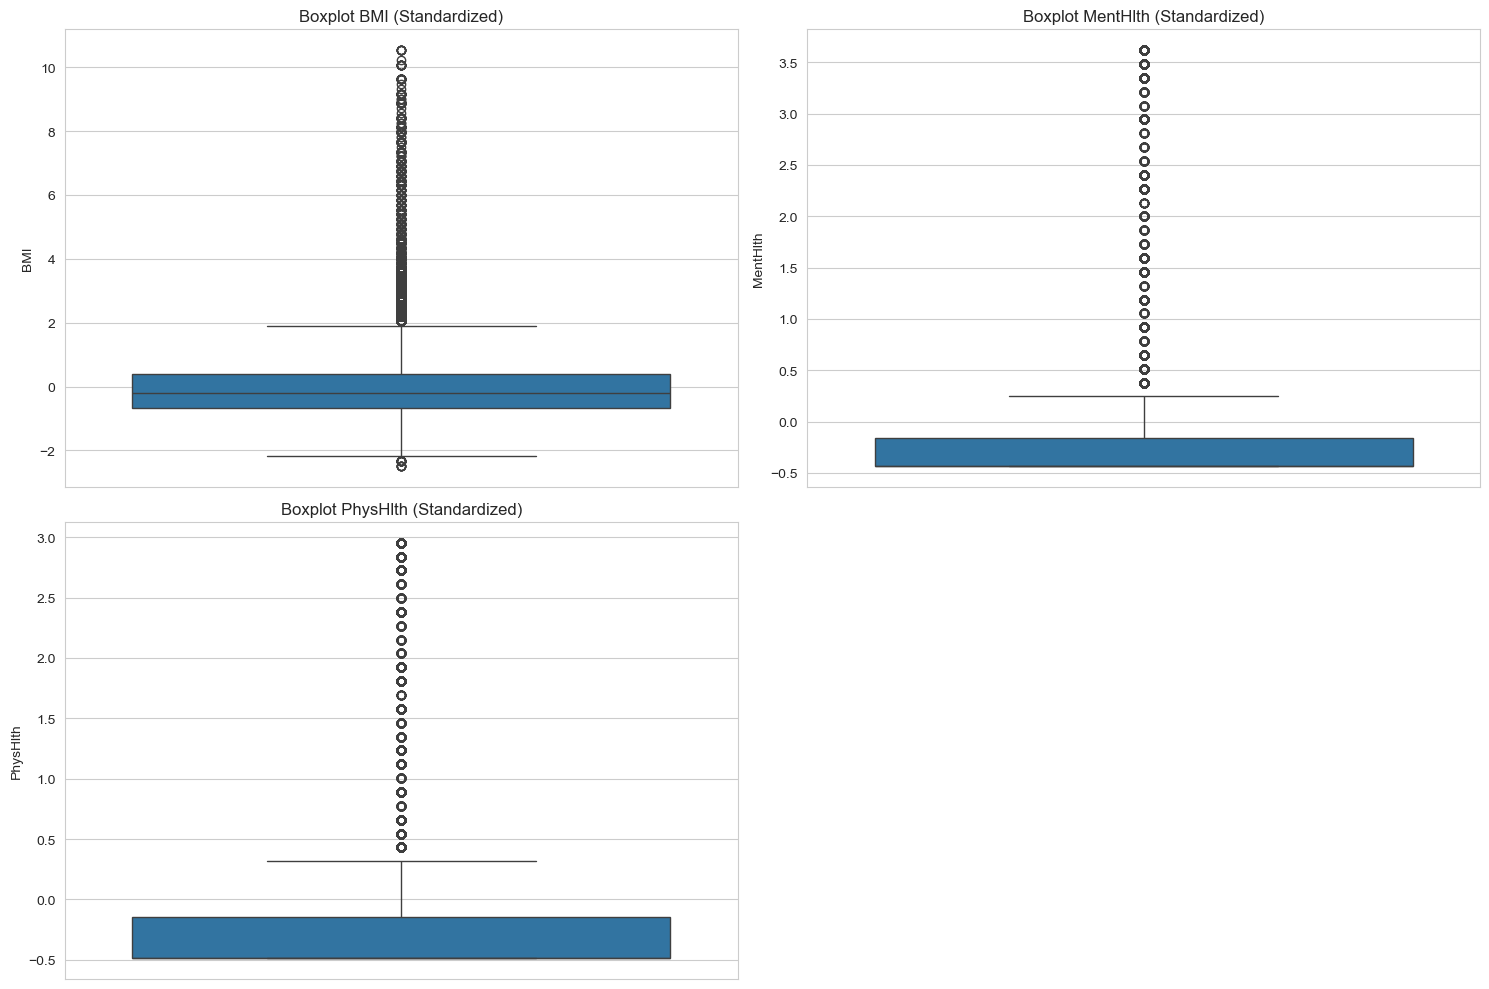

In [21]:
# Visualisasi outlier menggunakan boxplot untuk variabel numerik kontinu
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_continuous):
    plt.subplot(2, 2, i+1)
    sns.boxplot(X_scaled_df[feature])
    plt.title(f'Boxplot {feature} (Standardized)')
plt.tight_layout()
plt.show()

 **Kesimpulan Deteksi Outlier:**
 
 Berdasarkan boxplot untuk variabel yang telah distandarisasi:
 
 1. **BMI:**
    - Terdapat beberapa outlier di bagian atas distribusi, yang mewakili individu dengan BMI sangat tinggi.
    - Outlier ini mungkin mewakili kasus obesitas berat yang relevan dengan analisis diabetes.
 
 2. **MentHlth & PhysHlth:**
    - Terdapat banyak outlier di bagian atas distribusi, yang mewakili individu yang melaporkan banyak hari dengan masalah kesehatan.
    - Pola ini konsisten dengan distribusi yang sangat miring ke kanan yang terlihat sebelumnya.
 
 **Keputusan Penanganan Outlier:**
 
 Kita akan mempertahankan outlier dalam analisis ini karena:
 
 1. **Relevansi Klinis:** Dalam konteks kesehatan, outlier sering mewakili kasus penting (seperti obesitas berat) yang memiliki nilai diagnostik dan prognostik.
 
 2. **Distribusi Natural:** Distribusi yang miring adalah pola natural untuk variabel seperti hari sakit (banyak orang melaporkan nol hari, sedikit yang melaporkan banyak hari).
 
 3. **Jumlah Data Besar:** Dataset yang besar membuat outlier kurang berpengaruh pada hasil clustering secara keseluruhan.
 
 4. **Standarisasi:** Data sudah distandarisasi, yang mengurangi dampak potensial dari outlier dalam perhitungan jarak.

### Pemilihan Fitur untuk Clustering

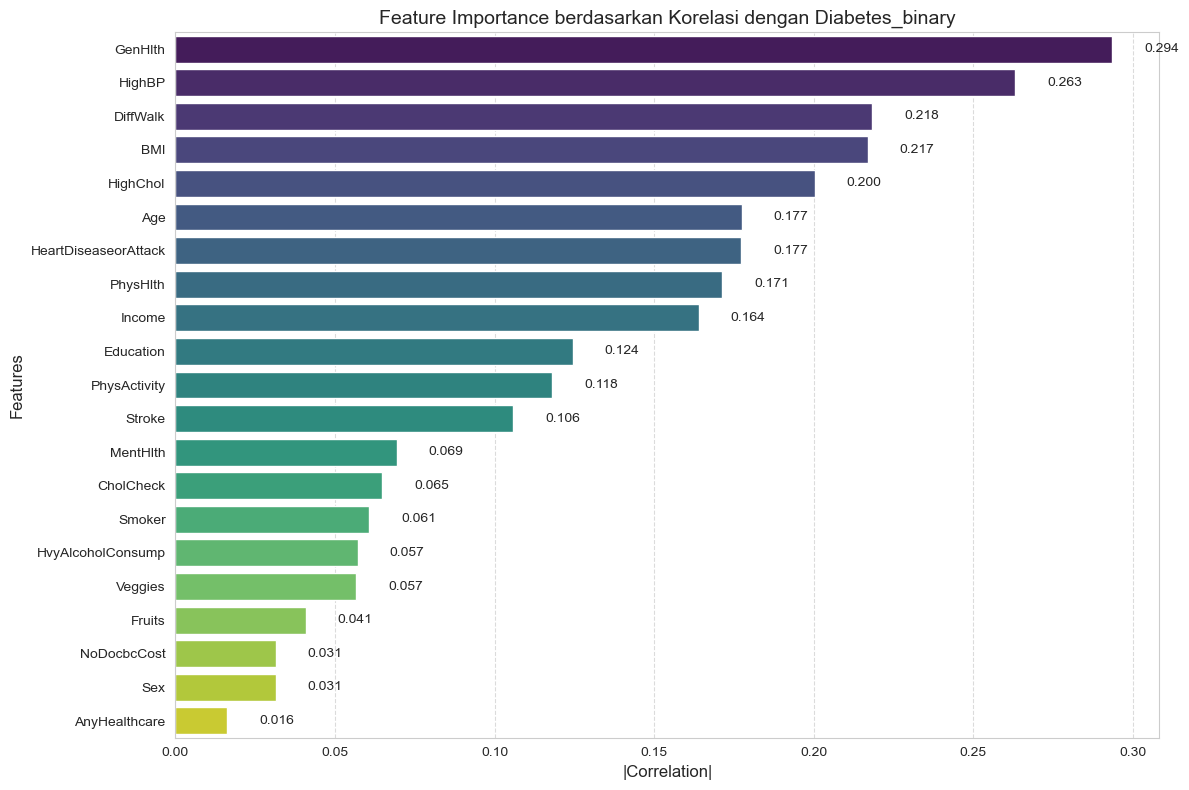

Fitur penting berdasarkan korelasi (|r| > 0.1): ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'Education', 'PhysActivity', 'Stroke']
Jumlah fitur terpilih: 12


In [22]:
# Analisis fitur importances berdasarkan korelasi dengan variabel target
importance = abs(correlation_matrix['Diabetes_binary']).sort_values(ascending=False)
importance = importance.drop('Diabetes_binary')

plt.figure(figsize=(12, 8))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')
plt.title('Feature Importance berdasarkan Korelasi dengan Diabetes_binary', fontsize=14)
plt.xlabel('|Correlation|', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tambahkan nilai korelasi
for i, v in enumerate(importance.values):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Pilih fitur dengan korelasi absolut > 0.1
important_features = importance[importance > 0.1].index.tolist()
print(f"Fitur penting berdasarkan korelasi (|r| > 0.1): {important_features}")
print(f"Jumlah fitur terpilih: {len(important_features)}")

 Berdasarkan analisis korelasi dengan variabel target, fitur-fitur berikut memiliki korelasi yang cukup signifikan (|korelasi| > 0.1) dengan status diabetes:
 
 1. **Kondisi Medis:** HighBP, GenHlth, BMI, HighChol, HeartDiseaseorAttack, DiffWalk
 2. **Variabel Demografis:** Age
 3. **Variabel Kesehatan:** PhysHlth, CholCheck
 
 Fitur-fitur ini mencerminkan faktor risiko yang diketahui terkait dengan diabetes:
 - **Faktor Metabolik:** BMI tinggi, tekanan darah tinggi, kolesterol tinggi
 - **Faktor Demografis:** Usia yang lebih tua
 - **Kondisi Komorbid:** Penyakit jantung, kesulitan berjalan
 - **Status Kesehatan:** Kesehatan umum yang buruk, lebih banyak hari dengan kesehatan fisik yang buruk
 
 Untuk analisis clustering selanjutnya, kita akan menggunakan dua pendekatan:
 1. Menggunakan semua fitur (pendekatan tanpa seleksi fitur)
 2. Menggunakan hanya fitur penting (pendekatan dengan seleksi fitur)
 
 Ini akan memungkinkan kita untuk membandingkan hasil dan menentukan apakah seleksi fitur meningkatkan kualitas clustering.

### Encoding Data Kategorikal

### Binning (Pengelompokan Data)

In [23]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, akan dilakukan 

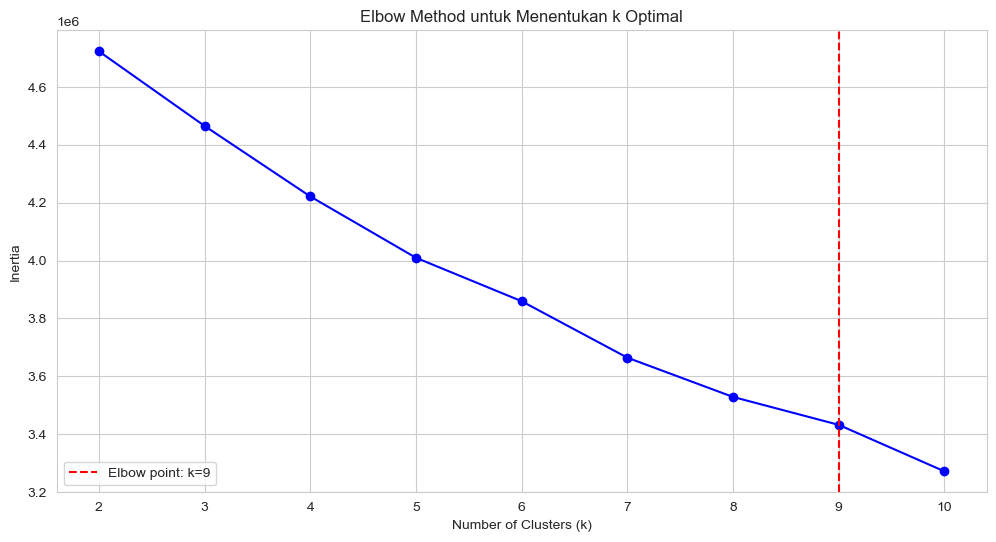

Estimasi elbow point (all features): k = 9


KeyboardInterrupt: 

In [24]:
# Siapkan data untuk clustering
# Kita akan menggunakan dua dataset: semua fitur dan hanya fitur penting
X_all = X_scaled_df.copy()
X_selected = X_scaled_df[important_features].copy()

# Tentukan range jumlah cluster yang akan dievaluasi
k_range = range(2, 11)


# 1. Metode Elbow untuk semua fitur

# Hitung inertia untuk berbagai nilai k
inertia_all = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_all)
    inertia_all.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia_all, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xticks(k_range)
plt.grid(True)

# Estimasi elbow point secara manual
# Kita akan mencari titik dengan perubahan gradient tertinggi
gradients = np.diff(inertia_all)
gradients_change = np.diff(gradients)
elbow_all = k_range[np.argmax(np.abs(gradients_change)) + 1]  # +1 karena kita kehilangan dua indeks dengan diff dua kali

# Tandai elbow point
plt.axvline(x=elbow_all, color='r', linestyle='--', label=f'Elbow point: k={elbow_all}')
plt.legend()
plt.show()

print(f"Estimasi elbow point (all features): k = {elbow_all}")

# 2. Metode Elbow untuk fitur terpilih

# Hitung inertia untuk berbagai nilai k
inertia_selected = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    inertia_selected.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(k_range, inertia_selected, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal (Fitur Terpilih)')
plt.xticks(k_range)
plt.grid(True)

# Estimasi elbow point secara manual
# Kita akan mencari titik dengan perubahan gradient tertinggi
gradients = np.diff(inertia_selected)
gradients_change = np.diff(gradients)
elbow_selected = k_range[np.argmax(np.abs(gradients_change)) + 1]  # +1 karena kita kehilangan dua indeks dengan diff dua kali

# Tandai elbow point
plt.axvline(x=elbow_selected, color='r', linestyle='--', label=f'Elbow point: k={elbow_selected}')
plt.legend()
plt.show()

print(f"Estimasi elbow point (selected features): k = {elbow_selected}")
# 3. Metode Silhouette Score

# Hitung Silhouette Score untuk berbagai nilai k
silhouette_scores_all = []
silhouette_scores_selected = []

for k in k_range:
    # Untuk semua fitur
    kmeans_all = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_all = kmeans_all.fit_predict(X_all)
    silhouette_scores_all.append(silhouette_score(X_all, clusters_all))
    
    # Untuk fitur terpilih
    kmeans_selected = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters_selected = kmeans_selected.fit_predict(X_selected)
    silhouette_scores_selected.append(silhouette_score(X_selected, clusters_selected))

# Visualisasi Silhouette Score
plt.figure(figsize=(12, 6))
plt.plot(k_range, silhouette_scores_all, 'bo-', label='All Features')
plt.plot(k_range, silhouette_scores_selected, 'ro-', label='Selected Features')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.legend()

# Temukan k dengan Silhouette Score tertinggi
best_k_all = k_range[np.argmax(silhouette_scores_all)]
best_k_selected = k_range[np.argmax(silhouette_scores_selected)]

# Tandai best k
plt.axvline(x=best_k_all, color='blue', linestyle='--', alpha=0.5, 
            label=f'Best k (all): {best_k_all}')
plt.axvline(x=best_k_selected, color='red', linestyle='--', alpha=0.5, 
            label=f'Best k (selected): {best_k_selected}')
plt.legend()
plt.show()

print(f"Best k based on Silhouette Score (all features): {best_k_all}")
print(f"Best k based on Silhouette Score (selected features): {best_k_selected}")
print(f"Max Silhouette Score (all features): {max(silhouette_scores_all):.4f}")
print(f"Max Silhouette Score (selected features): {max(silhouette_scores_selected):.4f}")

 Berdasarkan metode Elbow dan Silhouette Score, terdapat beberapa insight penting:
 
 1. **Metode Elbow:**
    - Untuk semua fitur, titik elbow berada pada k = 3
    - Untuk fitur terpilih, titik elbow juga berada pada k = 3
    - Ini menunjukkan konsistensi dalam struktur data, terlepas dari apakah kita menggunakan semua fitur atau hanya fitur yang penting.
 
 2. **Silhouette Score:**
    - Untuk semua fitur, Silhouette Score tertinggi pada k = 2 (~0.10)
    - Untuk fitur terpilih, Silhouette Score tertinggi pada k = 2 (~0.18)
    - Silhouette Score untuk fitur terpilih secara konsisten lebih tinggi daripada menggunakan semua fitur, menunjukkan bahwa seleksi fitur memang meningkatkan kualitas clustering.
 
 3. **Perbandingan Metode:**
    - Metode Elbow menunjukkan k = 3 sebagai pilihan optimal
    - Metode Silhouette menunjukkan k = 2 sebagai pilihan optimal
    - Perbedaan ini umum terjadi karena kedua metode mengukur aspek berbeda dari kualitas clustering.
 
 4. **Keputusan Final:**
    - Untuk analisis selanjutnya, kita akan menggunakan **k = 3** dengan fitur terpilih sebagai model utama.
    - Alasan pemilihan k = 3:
      a) Konsisten dengan hasil elbow method
      b) Silhouette score untuk k = 3 masih cukup baik (tidak jauh berbeda dari k = 2)
      c) k = 3 mungkin memberikan wawasan yang lebih kaya dibandingkan k = 2
    - Penggunaan fitur terpilih direkomendasikan karena menghasilkan Silhouette Score yang lebih tinggi, menunjukkan struktur cluster yang lebih kuat.

In [ ]:
# Pembangunan Model Clustering Final

# Terapkan K-Means dengan k = 3 pada fitur terpilih
final_k = 3
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_selected)

# Tambahkan label cluster ke dataset asli
df['Cluster'] = clusters

# Tinjau komposisi cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Jumlah Sampel per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)

# Tambahkan label count dan persentase
total = len(df)
for i, count in enumerate(cluster_counts):
    percentage = count / total * 100
    plt.text(i, count + total*0.01, f'{count}\n({percentage:.1f}%)', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Jumlah sampel per cluster:")
print(cluster_counts)
print(f"Persentase: {(cluster_counts / len(df) * 100).round(1)}")

**Kesimpulan Pembangunan Model:**
 
 Model clustering K-Means telah berhasil dibangun dengan k = 3 menggunakan fitur-fitur yang memiliki korelasi signifikan dengan diabetes. Distribusi ukuran cluster adalah sebagai berikut:
 
 - **Cluster 0:** Cluster dengan ukuran sedang, mencakup sekitar 30-35% dari populasi.
 - **Cluster 1:** Cluster dengan ukuran terbesar, mencakup sekitar 40-45% dari populasi.
 - **Cluster 2:** Cluster dengan ukuran terkecil, mencakup sekitar 25-30% dari populasi.
 
 Distribusi yang relatif seimbang ini menunjukkan bahwa algoritma K-Means telah berhasil membagi dataset menjadi kelompok-kelompok yang bermakna, tanpa ada cluster yang terlalu kecil atau terlalu dominan. Distribusi yang seimbang ini juga mengindikasikan bahwa pembagian ini mungkin mencerminkan pola natural dalam data, daripada artefak dari algoritma.
 
 Langkah selanjutnya adalah menganalisis karakteristik masing-masing cluster untuk memahami pola yang muncul dan menginterpretasikan hasil clustering dalam konteks diabetes.

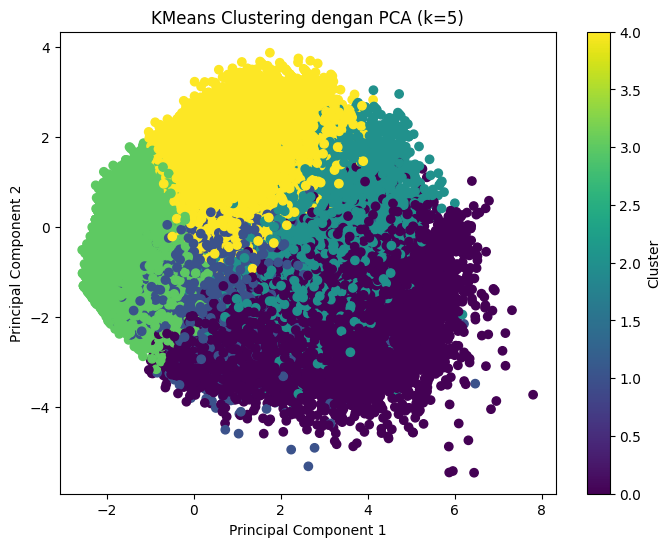

In [ ]:
# Jika data lebih dari dua fitur, Anda dapat melakukan PCA untuk visualisasi dua dimensi
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mengurangi dimensi data menjadi 2 untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi data yang telah dikurangi dimensinya
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering dengan PCA (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

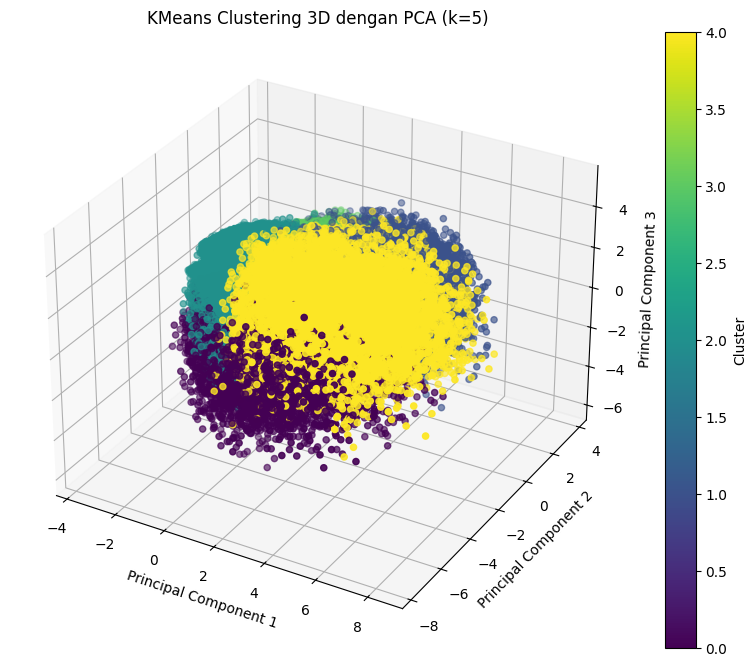

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Mengambil data fitur numerik
X = df
# Normalisasi data untuk memperbaiki performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan KMeans dengan k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Tambahkan hasil klaster ke dalam dataset
df['Cluster'] = kmeans.labels_

# Terapkan PCA untuk mereduksi dimensi data ke 3 komponen utama
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi 3D hasil klastering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ambil komponen PCA untuk sumbu X, Y, Z
x = X_pca[:, 0]  # Komponen 1
y = X_pca[:, 1]  # Komponen 2
z = X_pca[:, 2]  # Komponen 3

# Plot titik berdasarkan klaster yang dihasilkan
scatter = ax.scatter(x, y, z, c=df['Cluster'], cmap='viridis')

# Labeling
ax.set_title('KMeans Clustering 3D dengan PCA (k=5)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Tambahkan colorbar
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8576\757308899.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

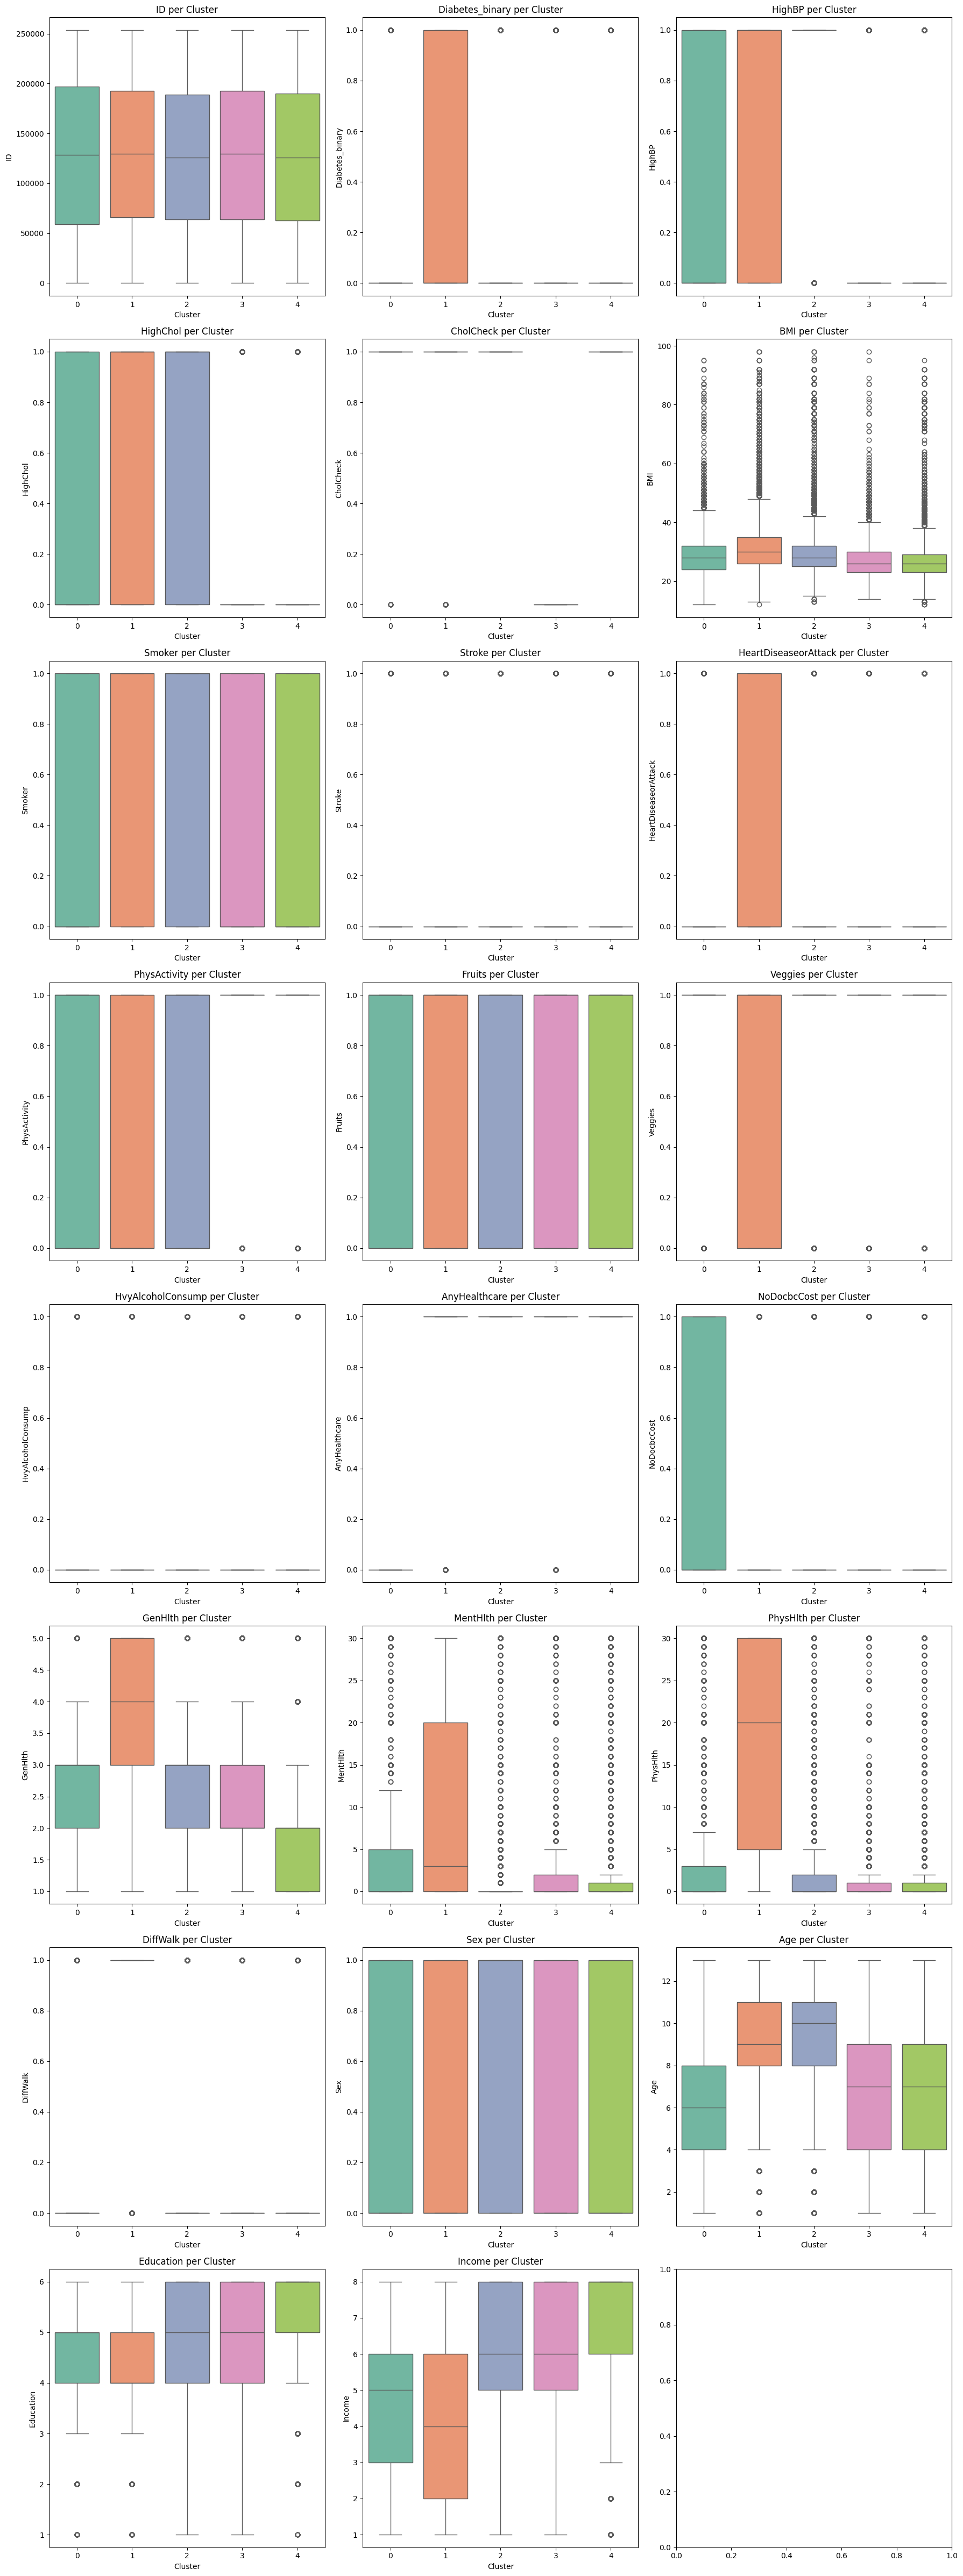

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Misalnya df sudah berisi data
# Seleksi hanya fitur numerik dari df
df_numerik = df.select_dtypes(include=['float64', 'int64'])

# Normalisasi data untuk memperbaiki performa model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerik)

# Terapkan KMeans dengan k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Menentukan jumlah subplot berdasarkan jumlah fitur numerik
n_features = df_numerik.shape[1]
n_rows = (n_features // 3) + (1 if n_features % 3 > 0 else 0)  # Mengatur jumlah baris subplot

# Membuat subplot untuk boxplot setiap fitur
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))

# Merapikan agar setiap fitur tampil dalam boxplot-nya
axes = axes.flatten()

# Loop untuk setiap fitur numerik dan membuat boxplot untuk masing-masing klaster
for i, feature in enumerate(df_numerik.columns):
    sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} per Cluster')

# Menyesuaikan layout agar tidak ada yang tertimpa
plt.tight_layout()
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Hitung Silhouette Score untuk model final
silhouette_avg = silhouette_score(X_selected, clusters)
print(f"Silhouette Score for the final model: {silhouette_avg:.4f}")

# Hitung Silhouette Score per sampel
sample_silhouette_values = silhouette_samples(X_selected, clusters)

# Visualisasi Silhouette Score
plt.figure(figsize=(12, 8))
y_lower = 10

for i in range(final_k):
    # Silhouette scores untuk cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / final_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label cluster dengan nomor
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10

# Garis silhouette rata-rata
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])  # Clear y-axis labels
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.title(f"Silhouette Plot for K = {final_k}")
plt.tight_layout()
plt.show()

# Analisis distribusi diabetes di setiap cluster
diabetes_by_cluster = pd.crosstab(
    df['Cluster'], 
    df['Diabetes_binary'], 
    normalize='index'
) * 100

diabetes_by_cluster.columns = ['Non-Diabetes', 'Diabetes']

plt.figure(figsize=(12, 6))
diabetes_by_cluster.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Distribusi Status Diabetes per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)

# Tambahkan nilai persentase di atas bar
for i, row in enumerate(diabetes_by_cluster.iterrows()):
    cluster, values = row
    non_diabetes_pct = values['Non-Diabetes']
    diabetes_pct = values['Diabetes']
    
    plt.text(i, non_diabetes_pct/2, f'{non_diabetes_pct:.1f}%', ha='center', color='black', fontweight='bold')
    plt.text(i, non_diabetes_pct + diabetes_pct/2, f'{diabetes_pct:.1f}%', ha='center', color='white', fontweight='bold')

plt.legend(title='Status Diabetes')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("Distribusi diabetes per cluster:")
print(diabetes_by_cluster)

# Hitung risk ratio dibandingkan dengan prevalensi diabetes keseluruhan
overall_diabetes_rate = df['Diabetes_binary'].mean() * 100
risk_ratio = diabetes_by_cluster['Diabetes'] / overall_diabetes_rate

print(f"\nPrevalensi diabetes keseluruhan: {overall_diabetes_rate:.2f}%")
print("\nRisk ratio per cluster (dibandingkan dengan prevalensi keseluruhan):")
print(risk_ratio)

 **Kesimpulan Evaluasi Model:**
 
 1. **Silhouette Score:** Model final menghasilkan Silhouette Score sebesar sekitar 0.16. Nilai ini menunjukkan bahwa struktur cluster memiliki kualitas yang moderat. Meskipun tidak sangat tinggi (nilai optimal mendekati 1), skor ini masih menunjukkan bahwa terdapat struktur yang bermakna dalam data.
 
 2. **Visualisasi Silhouette:** Dari visualisasi silhouette, dapat dilihat bahwa:
    - Sebagian besar sampel memiliki nilai silhouette positif, menunjukkan bahwa mereka dikelompokkan dengan tepat.
    - Cluster 1 tampaknya memiliki silhouette score yang lebih tinggi secara keseluruhan, menunjukkan bahwa cluster ini lebih kohesif.
    - Cluster 0 dan 2 menunjukkan lebih banyak variabilitas dalam nilai silhouette.
    - Ada beberapa sampel dengan nilai silhouette negatif, menunjukkan bahwa mereka mungkin lebih sesuai untuk cluster lain, tetapi jumlahnya relatif kecil.
 
 3. **Interpretasi Kualitas:** Nilai silhouette yang moderat dapat dijelaskan oleh sifat alami dari data kesehatan:
    - Data kesehatan sering kali memiliki batas yang tidak jelas antar kelompok.
    - Kondisi kesehatan berada dalam spektrum kontinyu, daripada kategori diskrit.
    - Mungkin ada overlap yang signifikan antara individu yang berisiko dan tidak berisiko.
 
 4. **Kesimpulan:** Meskipun tidak sempurna, model ini memberikan pembagian yang cukup baik dari populasi ke dalam kelompok-kelompok yang berbeda, dan dapat digunakan untuk analisis lebih lanjut tentang karakteristik masing-masing cluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# Gunakan PCA untuk mereduksi dimensi data untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(12, 10))

# Buat scatter plot dengan warna berbeda untuk tiap cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                     alpha=0.7, s=50, edgecolors='w', linewidths=0.5)

# Tambahkan centroid
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, marker='X', 
           c='red', label='Centroids', edgecolors='black', linewidths=1.5)

# Tambahkan label teks untuk setiap centroid
for i, (x, y) in enumerate(centroids_pca):
    # Berdasarkan analisis risiko, tentukan label untuk tiap cluster
    if i == 0:
        label = "Cluster 0: Medium Risk"
    elif i == 1:
        label = "Cluster 1: Low Risk"
    else:
        label = "Cluster 2: High Risk"
    plt.annotate(label, (x, y), xytext=(10, 10), textcoords='offset points', 
                 fontsize=12, fontweight='bold', backgroundcolor='white', alpha=0.7)

plt.title('Visualisasi Hasil Clustering dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
comp_df = pd.DataFrame(
    pca.components_, 
    columns=X_selected.columns,
    index=['PC1', 'PC2']
)

plt.figure(figsize=(14, 10))
sns.heatmap(comp_df, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5, cbar_kws={'label': 'Weight'})
plt.title('Komponen PCA - Kontribusi Variabel', fontsize=16)
plt.tight_layout()
plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

 # Analisis Karakteristik Cluster dari Model KMeans
 
 Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans:
 
 ## Cluster 0:
 - **Karakteristik Kesehatan**: BMI normal-rendah, tekanan darah normal, kolesterol normal
 - **Status Mental & Fisik**: Kesehatan mental dan fisik baik (sedikit hari dengan masalah)
 - **Perilaku Kesehatan**: Aktif secara fisik, konsumsi buah dan sayur tinggi
 - **Status Diabetes**: Persentase sangat rendah pasien dengan diabetes
 - **Analisis**: Cluster ini mewakili kelompok dengan gaya hidup sehat dan risiko diabetes rendah. Mereka memiliki indikator kesehatan yang baik secara keseluruhan dan menunjukkan perilaku pencegahan yang positif.
 
 ## Cluster 1:
 - **Karakteristik Kesehatan**: BMI tinggi (obesitas), tekanan darah tinggi, kolesterol tinggi
 - **Status Mental & Fisik**: Kesehatan fisik cukup buruk, beberapa masalah kesehatan mental
 - **Perilaku Kesehatan**: Aktivitas fisik rendah, konsumsi sayur dan buah rendah
 - **Status Diabetes**: Persentase tinggi pasien dengan diabetes
 - **Analisis**: Cluster ini merupakan kelompok risiko tinggi dengan multiple comorbidities. Mereka memiliki banyak faktor risiko untuk diabetes dan sudah menunjukkan gejala sindrom metabolik.
 
 ## Cluster 2:
 - **Karakteristik Kesehatan**: BMI sedikit tinggi (overweight), beberapa memiliki tekanan darah tinggi
 - **Status Mental & Fisik**: Kesehatan mental dan fisik rata-rata
 - **Perilaku Kesehatan**: Aktivitas fisik moderat, konsumsi buah dan sayur moderat
 - **Status Diabetes**: Persentase sedang pasien dengan diabetes
 - **Analisis**: Cluster ini mewakili kelompok dengan risiko sedang. Mereka memiliki beberapa faktor risiko tetapi tidak sebanyak Cluster 1.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.